In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('hotel_bookings 2.csv')
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [68]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [70]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [71]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [72]:
df.drop(["company","agent"],axis=1,inplace=True)
df.dropna(inplace=True)

In [73]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [74]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [75]:
df=df[df["adr"]<5000]

In [76]:
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


<BarContainer object of 2 artists>

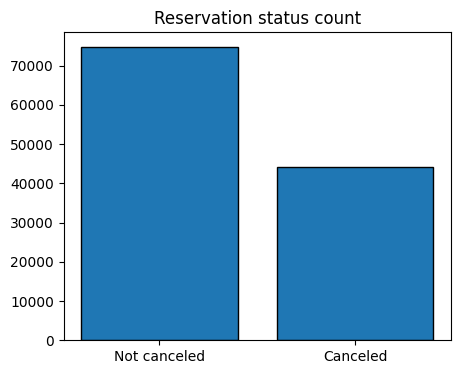

In [77]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not canceled","Canceled"],df["is_canceled"].value_counts(),edgecolor='k')

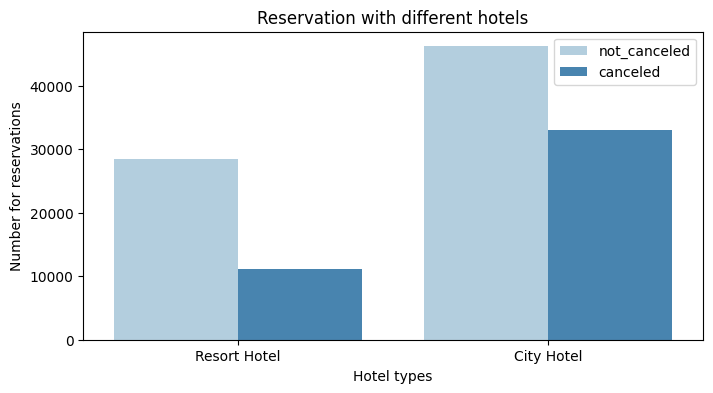

In [78]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df,palette="Blues")
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation with different hotels")
plt.xlabel('Hotel types')
plt.ylabel('Number for reservations')
plt.legend(['not_canceled','canceled'])


In [79]:
resort_hotels=df[df['hotel']=='Resort Hotel']
resort_hotels['is_canceled'].value_counts(normalize=True)


0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [80]:
city_hotels=df[df['hotel']=='City Hotel']
city_hotels['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [81]:
resort_hotels = resort_hotels.groupby("reservation_status_date")[["adr"]].mean()
city_hotels = city_hotels.groupby("reservation_status_date")[["adr"]].mean()

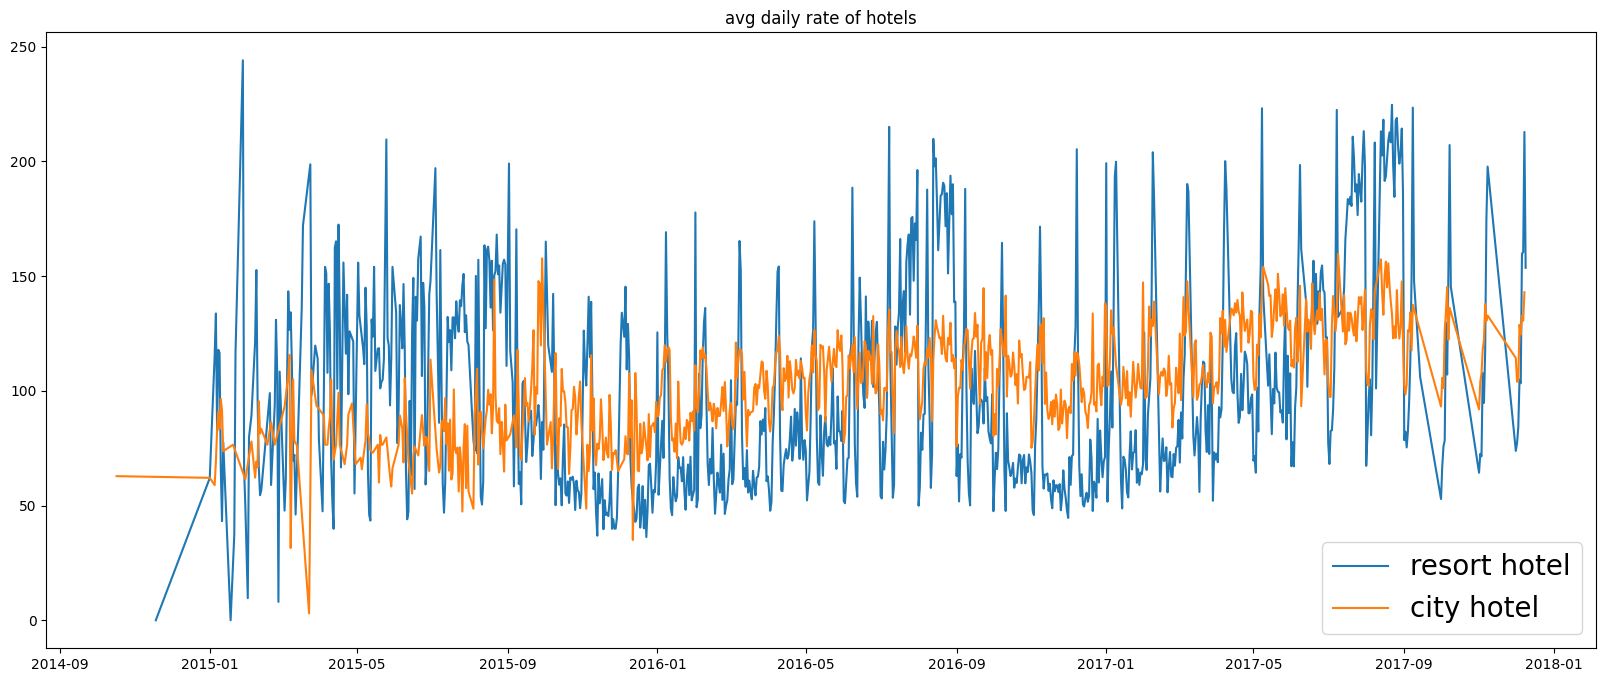

In [82]:
plt.figure(figsize=(20,8))
plt.title('avg daily rate of hotels')
plt.plot(resort_hotels.index,resort_hotels["adr"],label='resort hotel')
plt.plot(city_hotels.index,city_hotels["adr"],label='city hotel')
plt.legend(fontsize=20)

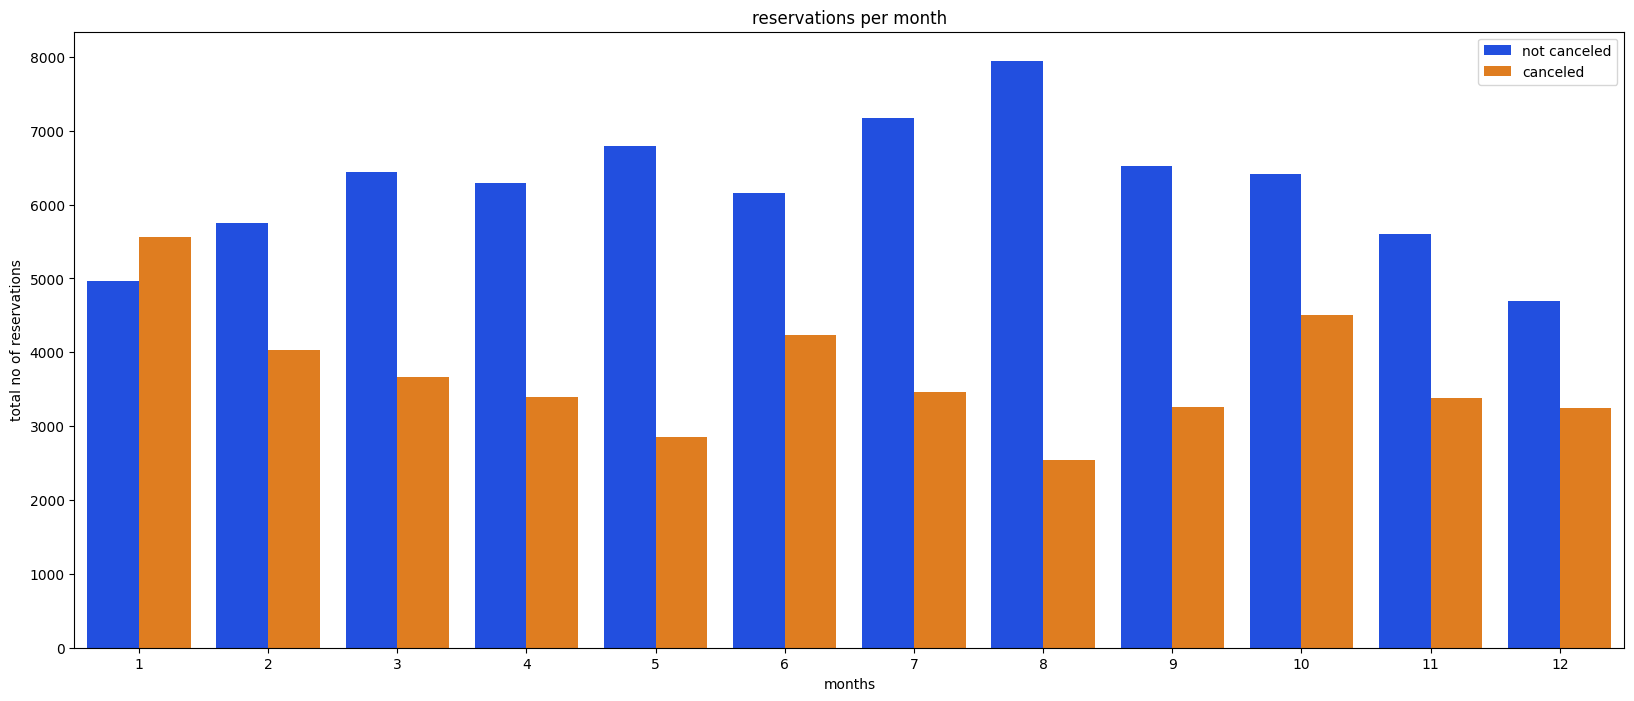

In [83]:
df["month"]=df["reservation_status_date"].dt.month
plt.figure(figsize=(20,8))
ax1=sns.countplot(x="month",hue="is_canceled",data=df,palette="bright")
legend_labels,_=ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("reservations per month")
plt.xlabel("months")
plt.ylabel("total no of reservations")
plt.legend(["not canceled","canceled"])


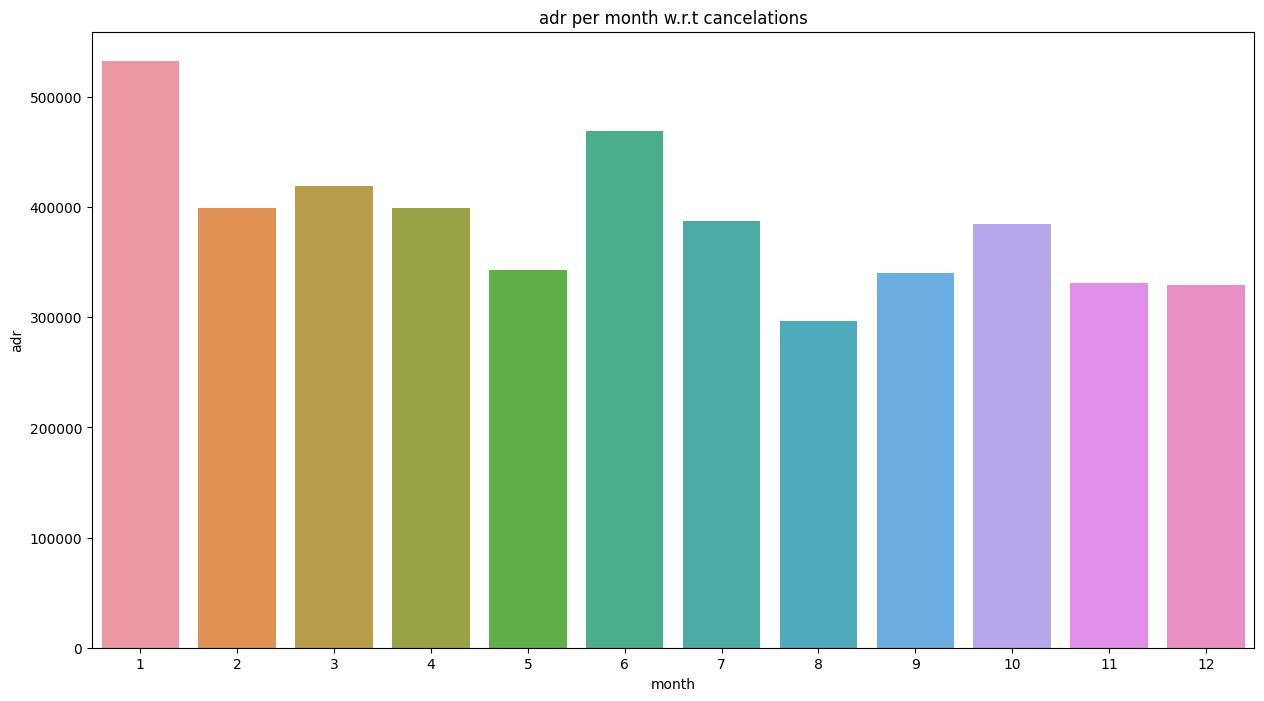

In [84]:
plt.figure(figsize=(15,8))
plt.title("adr per month w.r.t cancelations")
sns.barplot(x="month",y="adr",data =df[df["is_canceled"]==1].groupby("month")[["adr"]].sum().reset_index())
plt.show()

([<matplotlib.patches.Wedge at 0x1aa857d1d20>,
 [Text(-0.6485414980270044, 0.888478432679651, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917595, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')],
 [Text(-0.35374990801472966, 0.48462459964344595, '70.07'),
  Text(-0.06792491730531504, -0.5961427728397503, '6.25'),
  Text(0.1524996927172829, -0.5802963412956644, '5.54'),
  Text(0.331768787708183, -0.49992946652767184, '4.93'),
  Text(0.44969114711836744, -0.39721262845403943, '3.39'),
  Text(0.5208667671645117, -0.297821777013687, '3.10'),
  Text(0.5625053633194853, -0.20877671

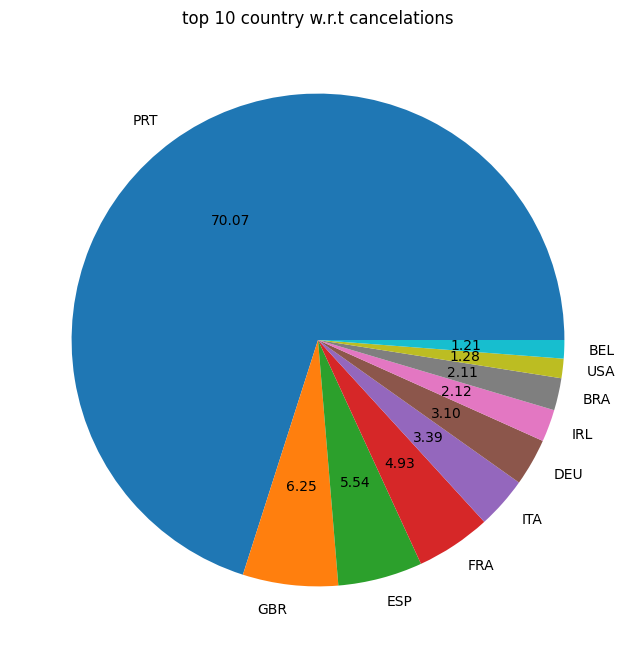

In [85]:
canceled_data = df[df["is_canceled"]==1]
top_10_country=canceled_data["country"].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("top 10 country w.r.t cancelations")
plt.pie(top_10_country,autopct="%.2f",labels=top_10_country.index)

In [87]:
df["market_segment"].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [88]:
canceled_data["market_segment"].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

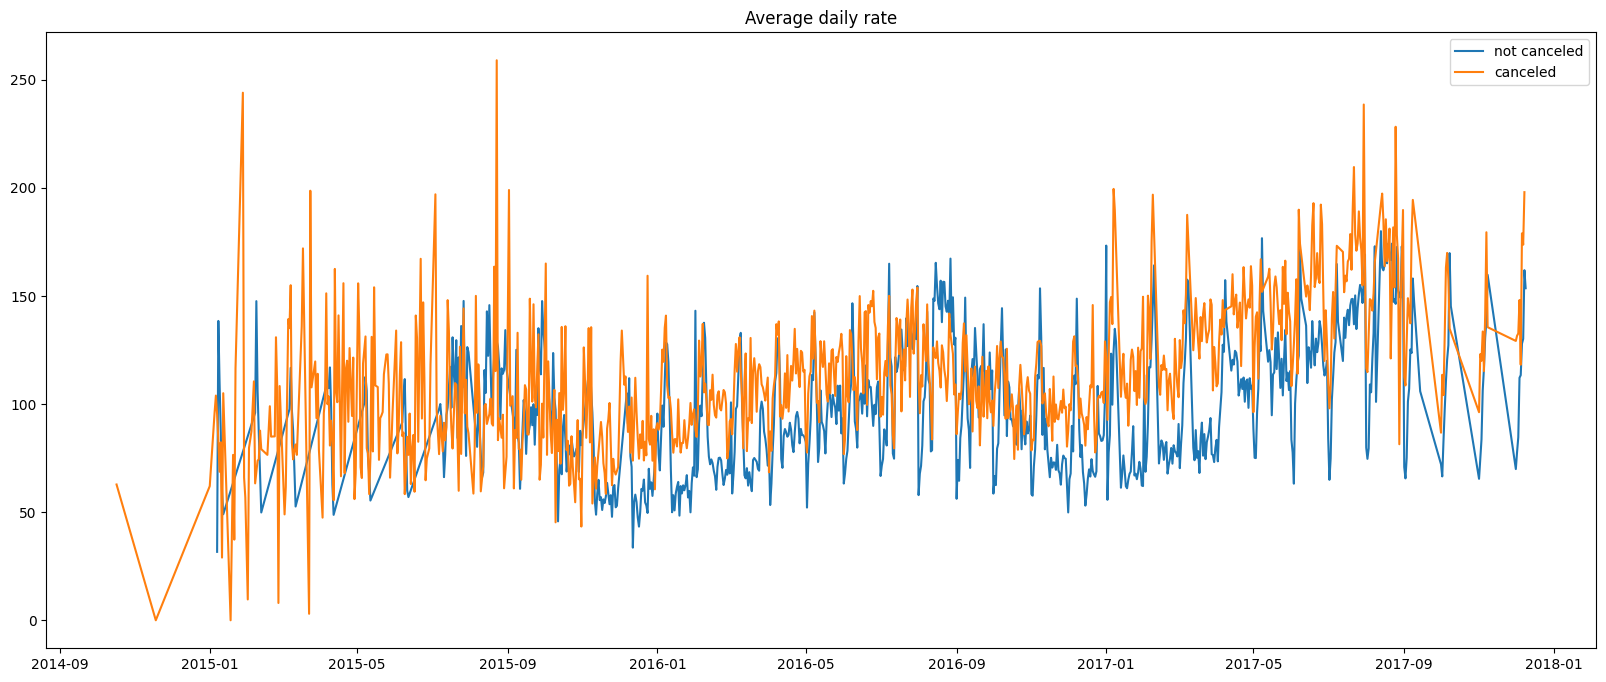

In [91]:
canceled_df_adr = canceled_data.groupby("reservation_status_date")[["adr"]].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values("reservation_status_date",inplace=True)

not_canceled_data = df[df["is_canceled"]==0]
not_canceled_df_adr=not_canceled_data.groupby("reservation_status_date")[["adr"]].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values("reservation_status_date",inplace=True)

plt.figure(figsize=(20,8))
plt.title("Average daily rate")
plt.plot(not_canceled_df_adr["reservation_status_date"],not_canceled_df_adr["adr"],label="not canceled")
plt.plot(canceled_df_adr["reservation_status_date"],canceled_df_adr["adr"],label="canceled")
plt.legend()


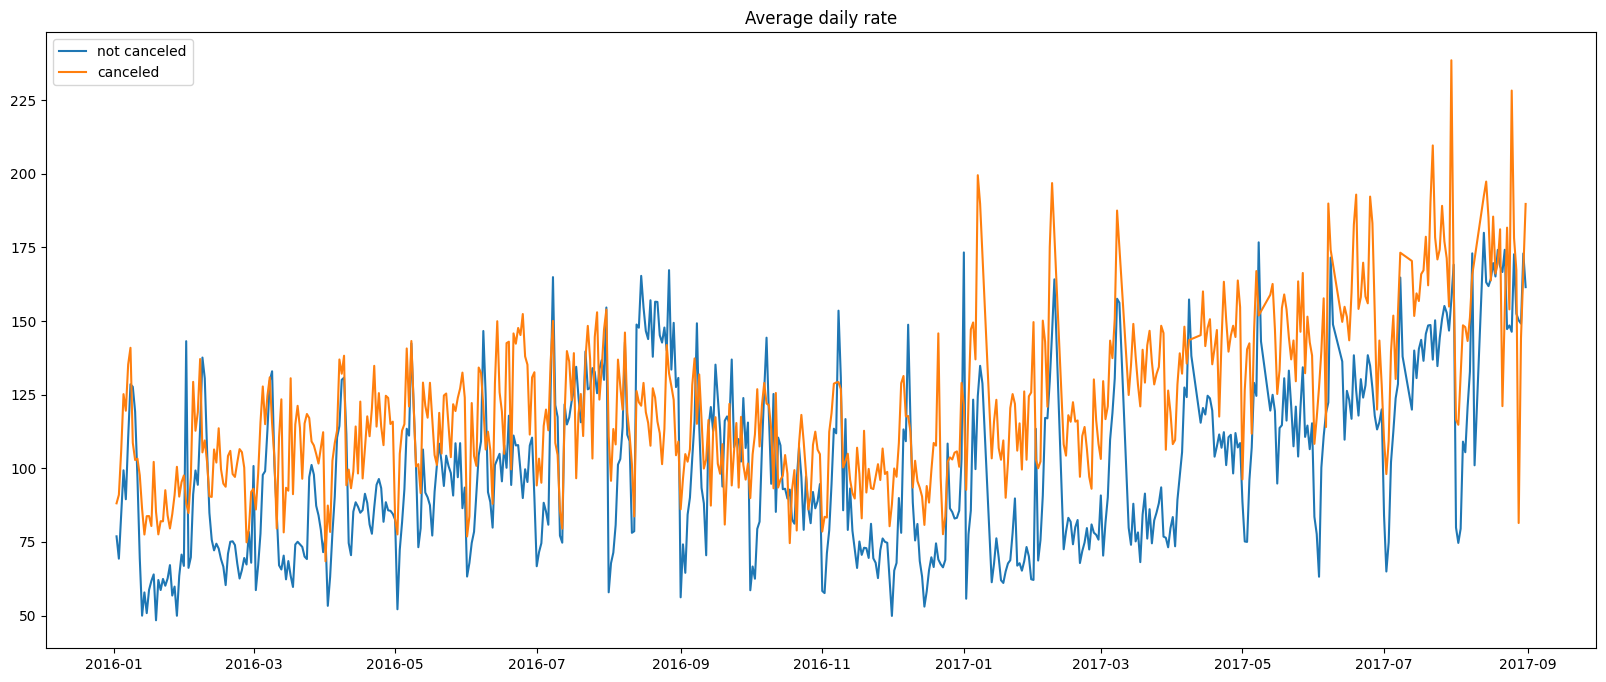

In [93]:
canceled_df_adr=canceled_df_adr[(canceled_df_adr["reservation_status_date"]>"2016") &(canceled_df_adr["reservation_status_date"]<"2017-09")]
not_canceled_df_adr=not_canceled_df_adr[(not_canceled_df_adr["reservation_status_date"]>"2016") &(not_canceled_df_adr["reservation_status_date"]<"2017-09")]
plt.figure(figsize=(20,8))
plt.title("Average daily rate")
plt.plot(not_canceled_df_adr["reservation_status_date"],not_canceled_df_adr["adr"],label="not canceled")
plt.plot(canceled_df_adr["reservation_status_date"],canceled_df_adr["adr"],label="canceled")
plt.legend()